In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import \
    cross_val_predict, cross_val_score, train_test_split, KFold

In [2]:
data = pd.read_csv('datasets/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
for key in ["Age", "Parch", "SibSp"]:
    data["key"] = data["key"].fillna(data["key"].median())

In [17]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data["Embarked"] = data["Embarked"].fillna("S") #or respect the proportions

In [28]:
SexNum = np.where(data["Sex"] == "male", 1, 0)
data["SexNum"] = SexNum

In [30]:
data["FamilySize"] = 1 + data["SibSp"] + data["Parch"]

In [119]:
data["Embarked_IsS"] = np.where(data["Embarked"] == "S", 1, 0)
data["Embarked_IsC"] = np.where(data["Embarked"] == "C", 1, 0)

In [120]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,FamilySize,Embarked_IsS,Embarked_IsC
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,0,4,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,1,0,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,1,0,0


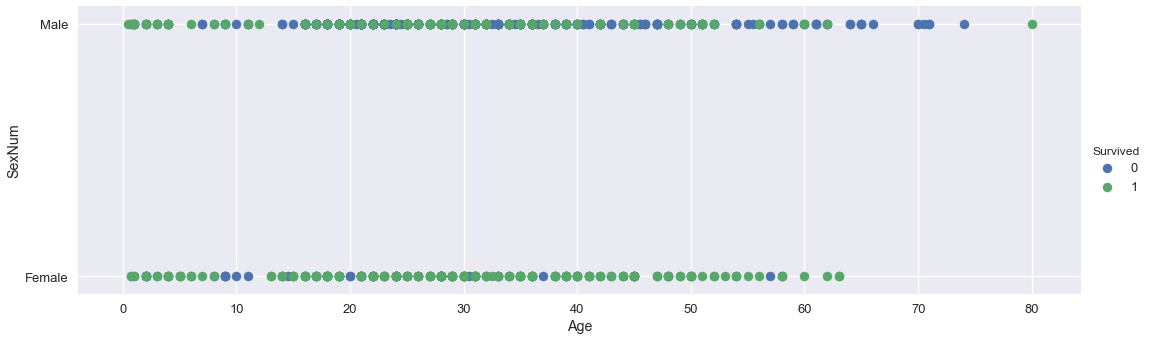

In [108]:
g = sns.FacetGrid(data, hue="Survived", size=5, aspect=3)
g.map(plt.scatter, "Age", "SexNum").add_legend()
plt.yticks([0,1], ('Female', 'Male'))
plt.show()

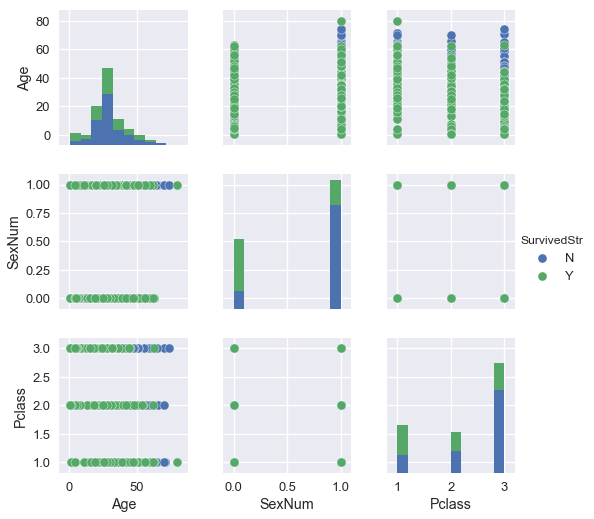

In [117]:
df = data[["Age", "SexNum", "Pclass"]].copy()
df["SurvivedStr"] = np.where(data["Survived"] == 1, "Y", "N")
sns.pairplot(df, hue="SurvivedStr")
plt.show()

In [146]:
# IMPORTANT !! don't forget to normalize the data before applying any ML algo
features = ["Pclass", "SexNum", "Age", "FamilySize", "Embarked_IsC", "Embarked_IsS"]
X = scale(data[features].copy())
y = scale(data[["Survived"]].copy()).ravel().astype(int)
print(X.mean(axis=0))
print(X.std(axis=0))

[ -8.77213254e-17  -1.15632656e-16   2.27277979e-16  -2.39239978e-17
  -1.99366649e-17  -8.37339924e-17]
[ 1.  1.  1.  1.  1.  1.]


In [154]:
scores = np.array([])
n_neighbors = range(1,50)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    #knn.fit(X,y)
    scores = np.append(scores, cross_val_score(knn, X, y, cv=5).mean())

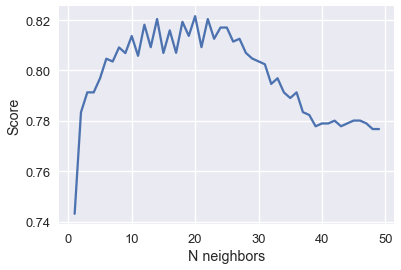

In [157]:
sns.set_context("talk")
plt.plot(n_neighbors, scores)
plt.xlabel("N neighbors")
plt.ylabel("Score")
plt.show()